In [1]:
import torch
from torch import nn
from torch.utils.data import Dataset, DataLoader
import torchvision
from torchvision import transforms
from torch.optim.lr_scheduler import MultiStepLR
from datetime import datetime
from archi import ResNet18
from sklearn.manifold import TSNE
from training_utils import accuracy_evaluation
import numpy as np
import matplotlib.pyplot as plt

### Dataset

In [2]:
data_dir = 'dataset'
train_dataset = torchvision.datasets.CIFAR10(data_dir, train=True, download=False)
test_dataset  = torchvision.datasets.CIFAR10(data_dir, train=False, download=False)

train_transform = transforms.Compose([
                                transforms.RandomCrop(32, padding=4),
                                transforms.RandomHorizontalFlip(),
                                transforms.ToTensor(),
                                transforms.Normalize(
                                 (0.49139968, 0.48215841, 0.44653091), (0.24703223, 0.24348513, 0.26158784)),
                                ])

test_transform = transforms.Compose([
                               transforms.ToTensor(),
                               transforms.Normalize(
                                (0.49139968, 0.48215841, 0.44653091), (0.24703223, 0.24348513, 0.26158784))])

train_dataset.transform = train_transform

test_dataset.transform = test_transform

batch_size= 128
train_loader = DataLoader(train_dataset, batch_size=batch_size,shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size,shuffle=True)

### Loading models training with softmax loss and our loss

In [3]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

# model trained with softmax loss
model1 = ResNet18().to(device)
model1.load_state_dict(torch.load('./resnet18_sgd_softmax_loss_200_epochs'))
model1.eval()
correct1 = accuracy_evaluation(test_loader, model1)
print(correct1)

# model trained with our loss
model2 = ResNet18().to(device)
model2.load_state_dict(torch.load('./resnet18_sgd_margin_compact_loss_200_epochs'))
model2.eval()
correct2 = accuracy_evaluation(test_loader, model2)
print(correct2)

Using cuda device
0.9134
0.9393


## t-SNE

### Penultimate layer

In [5]:
#softmax loss
feature_test = None
label1 = []
with torch.no_grad():
    for loader in test_loader:
        X,y = loader
        X = X.cuda()
        if feature_test is None:
            feature_test = np.array(model1.forward_before_softmax(X).cpu())
        else:
            feature_test = np.concatenate((feature_test,np.array(model1.forward_before_softmax(X).cpu())))
        label1 += list(np.array(y.cpu()).reshape(-1,))
print(feature_test.shape, len(label1))
feature_embedded1 = TSNE(n_components=2).fit_transform(feature_test)
print(feature_embedded1.shape)

# our loss
feature_test = None
label2 = []
with torch.no_grad():
    for loader in test_loader:
        X,y = loader
        X = X.cuda()
        if feature_test is None:
            feature_test = np.array(model2.forward_before_softmax(X).cpu())
        else:
            feature_test = np.concatenate((feature_test,np.array(model2.forward_before_softmax(X).cpu())))
        label2 += list(np.array(y.cpu()).reshape(-1,))
print(feature_test.shape, len(label2))
feature_embedded2 = TSNE(n_components=2).fit_transform(feature_test)
print(feature_embedded2.shape)

(10000, 30) 10000
(10000, 2)
(10000, 30) 10000
(10000, 2)


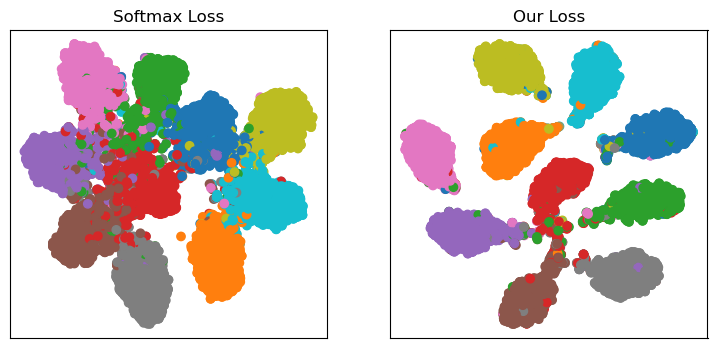

In [6]:
fig = plt.figure(figsize=(9,4))
plt.subplot(1,2,1)
plt.xticks([])
plt.yticks([])
plt.scatter(feature_embedded1[:,0],feature_embedded1[:,1], c=label1, cmap='tab10')
plt.title("Softmax Loss")
plt.subplot(1,2,2)
plt.scatter(feature_embedded2[:,0],feature_embedded2[:,1], c=label2, cmap='tab10')
plt.xticks([])
plt.yticks([])
plt.title("Our Loss")
plt.show()

### Conv Bloc 3

In [7]:
#softmax loss
feature_test = None
label1 = []
with torch.no_grad():
    for loader in test_loader:
        X,y = loader
        X = X.cuda()
        if feature_test is None:
            feature_test = np.array(model1.forward3(X).cpu())
        else:
            feature_test = np.concatenate((feature_test,np.array(model1.forward3(X).cpu())))
        label1 += list(np.array(y.cpu()).reshape(-1,))
print(feature_test.shape, len(label1))
feature_embedded1 = TSNE(n_components=2).fit_transform(feature_test)
print(feature_embedded1.shape)

# our loss
feature_test = None
label2 = []
with torch.no_grad():
    for loader in test_loader:
        X,y = loader
        X = X.cuda()
        if feature_test is None:
            feature_test = np.array(model2.forward3(X).cpu())
        else:
            feature_test = np.concatenate((feature_test,np.array(model2.forward3(X).cpu())))
        label2 += list(np.array(y.cpu()).reshape(-1,))
print(feature_test.shape, len(label2))
feature_embedded2 = TSNE(n_components=2).fit_transform(feature_test)
print(feature_embedded2.shape)

(10000, 256) 10000
(10000, 2)
(10000, 256) 10000
(10000, 2)


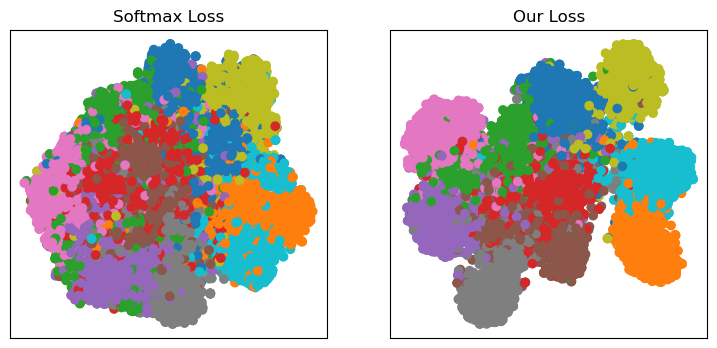

In [8]:
fig = plt.figure(figsize=(9,4))
plt.subplot(1,2,1)
plt.xticks([])
plt.yticks([])
plt.scatter(feature_embedded1[:,0],feature_embedded1[:,1], c=label1, cmap='tab10')
plt.title("Softmax Loss")
plt.subplot(1,2,2)
plt.scatter(feature_embedded2[:,0],feature_embedded2[:,1], c=label2, cmap='tab10')
plt.xticks([])
plt.yticks([])
plt.title("Our Loss")
plt.show()

### Conv Bloc 4

In [9]:
#softmax loss
feature_test = None
label1 = []
with torch.no_grad():
    for loader in test_loader:
        X,y = loader
        X = X.cuda()
        if feature_test is None:
            feature_test = np.array(model1.forward4(X).cpu())
        else:
            feature_test = np.concatenate((feature_test,np.array(model1.forward4(X).cpu())))
        label1 += list(np.array(y.cpu()).reshape(-1,))
print(feature_test.shape, len(label1))
feature_embedded1 = TSNE(n_components=2).fit_transform(feature_test)
print(feature_embedded1.shape)

# our loss
feature_test = None
label2 = []
with torch.no_grad():
    for loader in test_loader:
        X,y = loader
        X = X.cuda()
        if feature_test is None:
            feature_test = np.array(model2.forward4(X).cpu())
        else:
            feature_test = np.concatenate((feature_test,np.array(model2.forward4(X).cpu())))
        label2 += list(np.array(y.cpu()).reshape(-1,))
print(feature_test.shape, len(label2))
feature_embedded2 = TSNE(n_components=2).fit_transform(feature_test)
print(feature_embedded2.shape)

(10000, 512) 10000
(10000, 2)
(10000, 512) 10000
(10000, 2)


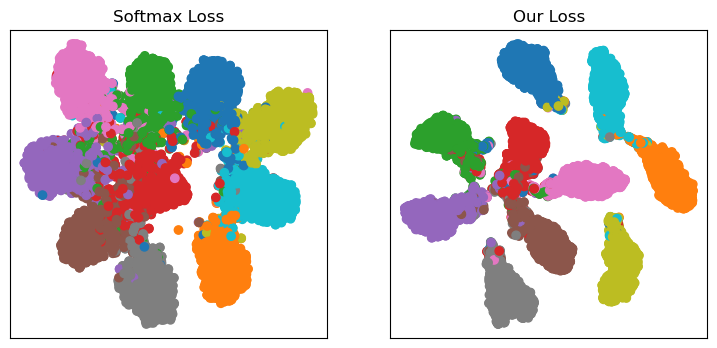

In [10]:
fig = plt.figure(figsize=(9,4))
plt.subplot(1,2,1)
plt.xticks([])
plt.yticks([])
plt.scatter(feature_embedded1[:,0],feature_embedded1[:,1], c=label1, cmap='tab10')
plt.title("Softmax Loss")
plt.subplot(1,2,2)
plt.scatter(feature_embedded2[:,0],feature_embedded2[:,1], c=label2, cmap='tab10')
plt.xticks([])
plt.yticks([])
plt.title("Our Loss")
plt.show()